In [12]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns   

data = pd.read_csv('penguins.csv')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [13]:
train_data, _ = train_test_split(data, test_size=0.3, random_state=42)
train_data = train_data[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", 'body_mass_g']]
train_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
34,36.4,17.0,195.0,3325.0
26,40.6,18.6,183.0,3550.0
292,48.2,15.6,221.0,5100.0
302,47.4,14.6,212.0,4725.0
61,41.3,21.1,195.0,4400.0


In [18]:
model = KMeans(n_clusters=5)
model.fit(train_data)

KMeans(n_clusters=5)

In [19]:
model.cluster_centers_

array([[  44.82068966,   16.72241379,  198.79310345, 4497.4137931 ],
       [  40.07058824,   17.64901961,  188.7254902 , 3279.41176471],
       [  50.16      ,   15.82      ,  222.3       , 5725.        ],
       [  43.27647059,   18.53823529,  192.69117647, 3789.70588235],
       [  47.29189189,   15.08918919,  217.2972973 , 5109.45945946]])

,Clusters,Silhouette
0,2,0.623732
1,3,0.590591
2,4,0.512207
3,5,0.549638
4,6,0.511080
5,7,0.541654
6,8,0.530342
7,9,0.520056
8,10,0.517620


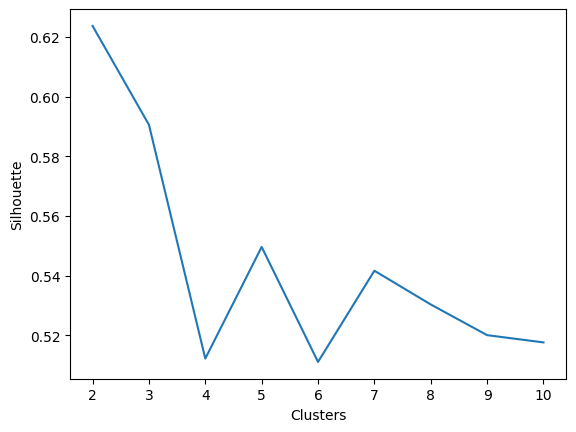

In [16]:
plot = {
    'Clusters': range(2, 11),
    'Silhouette': []

}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels  = kmeans.fit_predict(train_data)
    plot['Silhouette'].append(silhouette_score(train_data, labels))

plot = pd.DataFrame(plot)

sns.lineplot(x='Clusters', y='Silhouette', data=plot)
plot

<Axes: xlabel='Clusters', ylabel='Interia'>

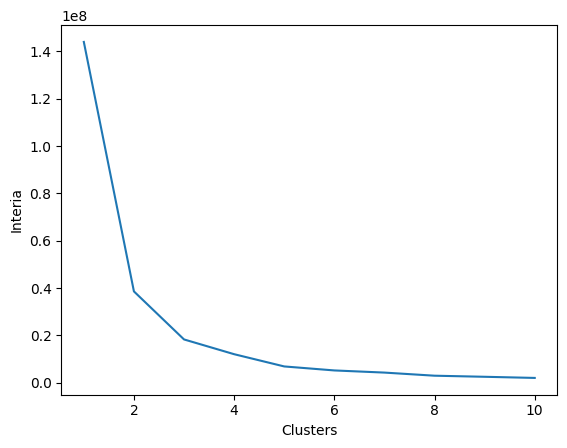

In [17]:
plot = {
    'Clusters': range(1, 11),
    'Interia': []

}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_data)
    plot['Interia'].append(kmeans.inertia_)


sns.lineplot(x='Clusters', y='Interia', data=plot)